# **Customer Segmentation**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
# Load the dataset
file_path = 'cleaned_ecommerce_data.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.isnull().sum())

   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics             12         3   
1        46251  2022-03-05 12:56:35             Home            468         4   
2        46251  2022-05-23 18:18:01             Home            288         2   
3        46251  2020-11-12 13:13:29         Clothing            196         1   
4        13593  2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age  Gender  Churn  
0  Christine Hernandez   37    Male      0  
1  Christine Hernandez   3

In [5]:
# Drop irrelevant columns
df_cleaned = df.drop(['Customer ID', 'Purchase Date', 'Customer Name', 'Churn'], axis=1)

# Check for and drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Confirm the cleaned dataset
print(df_cleaned.head())

  Product Category  Product Price  Quantity  Total Purchase Amount  \
0      Electronics             12         3                    740   
1             Home            468         4                   2739   
2             Home            288         2                   3196   
3         Clothing            196         1                   3509   
4             Home            449         1                   3452   

  Payment Method  Customer Age  Returns  Age  Gender  
0    Credit Card            37      0.0   37    Male  
1         PayPal            37      0.0   37    Male  
2         PayPal            37      0.0   37    Male  
3         PayPal            37      0.0   37    Male  
4    Credit Card            49      0.0   49  Female  


In [6]:
# Select relevant features
features = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Returns']

# Encode categorical variables if needed (optional)
df_encoded = pd.get_dummies(df_cleaned, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)

# Final feature selection (including encoded columns)
X = df_encoded[features + ['Product Category_Electronics', 'Payment Method_Credit Card', 'Gender_Male']]

# Preview the selected features
print(X.head())


   Product Price  Quantity  Total Purchase Amount  Customer Age  Returns  \
0             12         3                    740            37      0.0   
1            468         4                   2739            37      0.0   
2            288         2                   3196            37      0.0   
3            196         1                   3509            37      0.0   
4            449         1                   3452            49      0.0   

   Product Category_Electronics  Payment Method_Credit Card  Gender_Male  
0                          True                        True         True  
1                         False                       False         True  
2                         False                       False         True  
3                         False                       False         True  
4                         False                        True        False  


In [7]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

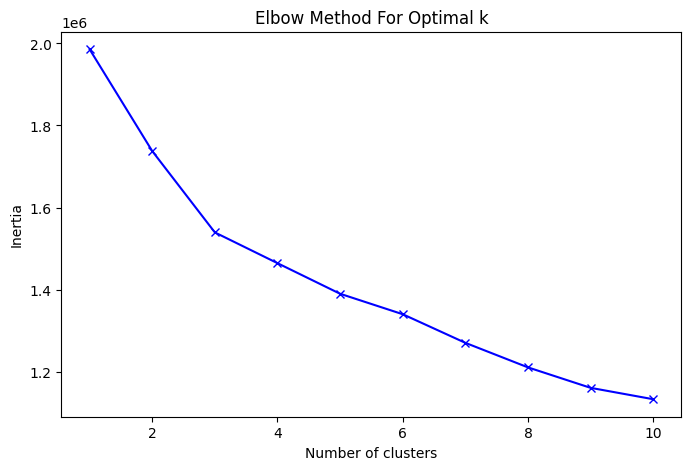

In [8]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [9]:
# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
df_encoded['Cluster'] = kmeans.labels_

# Preview the dataset with cluster labels
print(df_encoded[['Cluster'] + features].head())


   Cluster  Product Price  Quantity  Total Purchase Amount  Customer Age  \
0        2             12         3                    740            37   
1        0            468         4                   2739            37   
2        0            288         2                   3196            37   
3        0            196         1                   3509            37   
4        3            449         1                   3452            49   

   Returns  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


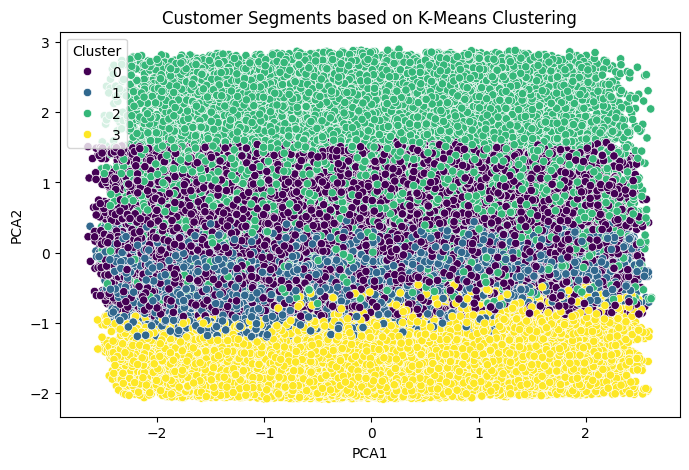

In [10]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results and cluster labels
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_encoded['Cluster']

# Plot the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Customer Segments based on K-Means Clustering')
plt.show()


In [13]:
import joblib

# Save the KMeans model
joblib.dump(kmeans, 'customer_segmentation_model.pkl')


['customer_segmentation_model.pkl']